# Data Exploration

In [3]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu

np.set_printoptions(precision=2, linewidth=80)

## Load the dataset

In [2]:
dataset = pd.read_csv(r'Movie_Reviews.tsv',sep = '\t')
dataset = dataset.drop(columns=['Unnamed: 0'])

In [6]:
# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['Review'])
sentiments = np.array(dataset['Sentiment'])

                                              Review Sentiment
0  Bromwell High is a cartoon comedy. It ran at t...  positive
1  Homelessness (or Houselessness as George Carli...  positive
2  Brilliant over-acting by Lesley Ann Warren. Be...  positive
3  This is easily the most underrated film inn th...  positive
4  This is not the typical Mel Brooks film. It wa...  positive


## Normalize the dataset

In [4]:
# Normalize the data
norm_reviews = tn.normalize_corpus(reviews)

NameError: name 'tn' is not defined

### Save cleaned data to csv

In [5]:
# Save the normalized dataframe for later use
df = pd.DataFrame({'Reviews': norm_reviews, 'Sentiments': sentiments}, columns=['Reviews', 'Sentiments'])
df.to_csv('Movie_Reviews_Clean.csv')

NameError: name 'norm_reviews' is not defined

### Load cleaned data

In [6]:
dataset = pd.read_csv('Movie_Reviews_Clean.csv')
#remove extra column
dataset = dataset.drop(columns=['Unnamed: 0'])

## Exploring Text Categories

In [7]:
# list column names and datatypes
dataset.dtypes

Reviews       object
Sentiments    object
dtype: object

In [10]:
#data frame length
len(dataset)

7000

In [ ]:
#number of values per column
dataset.count()

In [8]:
# select a sample of some data frame columns
pd.set_option('display.max_colwidth',False)
dataset[['Reviews','Sentiments']] \
  .sample(2, random_state=42)

,Reviews,Sentiments
6500,anybody really want understand hitler read wwi history not wwii history find happen war soldier live around dead corpse time many soldier go insane see wwi time call shellshocke call post traumatic stress disorder learn true horror wwi begin understand hitler understand human become desensitize death not evil simply way cope horror around movie unfortunately miss many read book subject watch movie path glory good wwi movie ever make see frustration soldier movie sense helplessness utter devaluation human life nothing bullet catcher movie miss really key point understand germany lose war million million germans lose life no real reason come utter economic collapse follow war factor create extremism loss family member massive poverty create always lead extremism unfortunately movie ignore factor become another throw away piece crap throw pile really no real value fictional movie base upon fictional character could give well idea hitler throw hitlers name would sell,negative
2944,production quality cast premise authentic new england waterbury ct locale lush john williams score result 3 4 star collector item unfortunately get passable 2 star decent flick mostly memorable try bring art house style film mainstream small town locale story ordinary people genre well satisfy grownup jane fonda unable hide braininess enough make character believable wonder not post doctorate yale instead work dead end factory job waterbury robert diniros character bit contrived illiterate nice guy loser turn actually little help janes character 1990 version henry ford thomas edison genre successfully handle nobodys fool mid 90 year 2003 schmidt wish main stream studio would try stuff post adolescent reserve couple screen multi cinema complex effort give effort,positive


In [9]:
# describe categorical columns of type np.object 
dataset[['Reviews','Sentiments']] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
Reviews,7000,6988,get movie free job along three similar movie watch low expectation movie not bad per se get pay tale love betrayal lie sex scandal everything want movie definitely not hollywood blockbuster cheap thrill not bad would probably never watch movie nutshell kind movie would see either late night local television station want take time would see sunday afternoon local television station try take time despite bad acting cliche line sub par camera work not desire turn movie pretend like never pop dvd player story many time many movie one no different no well no bad average movie,3
Sentiments,7000,2,positive,3501


## Creating Plots to count the length and words 


Text(0,0.5,'Number of reviews')

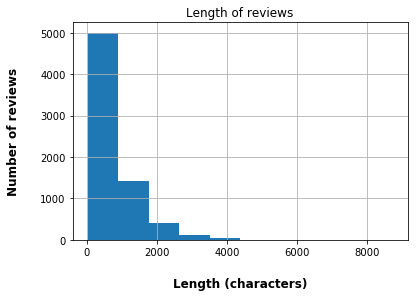

In [13]:
#check length of reviews
review_length_hist = dataset['Reviews'].str.len().hist()
review_length_hist.set_title("Length of reviews")
review_length_hist.set_xlabel("Length (characters)", labelpad=20, weight='bold', size=12)
review_length_hist.set_ylabel("Number of reviews", labelpad=20, weight='bold', size=12)

Text(0,0.5,'Number of reviews')

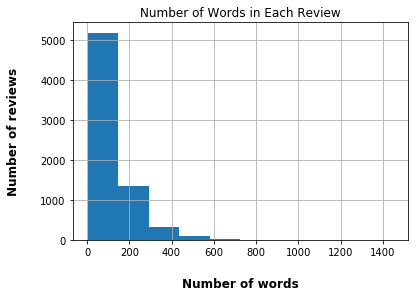

In [15]:
#number of words in each review
num_of_words_hist = dataset["Reviews"].str.split().\
    map(lambda x: len(x)).\
    hist()
num_of_words_hist.set_title("Number of Words in Each Review")
num_of_words_hist.set_xlabel("Number of words", labelpad=20, weight='bold', size=12)
num_of_words_hist.set_ylabel("Number of reviews", labelpad=20, weight='bold', size=12)

Text(0,0.5,'Number of reviews')

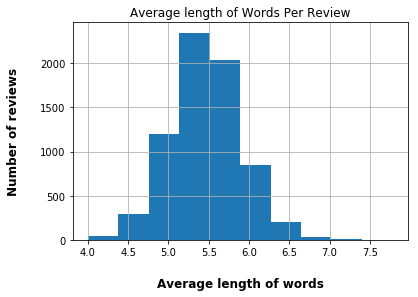

In [18]:
#check average length of words in each sentence
import numpy as np
length_of_words_hist = dataset['Reviews'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
length_of_words_hist.set_title("Average length of Words Per Review")
length_of_words_hist.set_xlabel("Average length of words", labelpad=20, weight='bold', size=12)
length_of_words_hist.set_ylabel("Number of reviews", labelpad=20, weight='bold', size=12)

## Checking for unique values

In [19]:
dataset['Reviews'].value_counts()[:10]

get movie free job along three similar movie watch low expectation movie not bad per se get pay tale love betrayal lie sex scandal everything want movie definitely not hollywood blockbuster cheap thrill not bad would probably never watch movie nutshell kind movie would see either late night local television station want take time would see sunday afternoon local television station try take time despite bad acting cliche line sub par camera work not desire turn movie pretend like never pop dvd player story many time many movie one no different no well no bad average movie                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [20]:
# number of unique values = count distinct
dataset['Reviews'].nunique()

6988

# Exploting the dataset as a whole

## Creating a list of tokens from the document

In [22]:
# Define tokenizer function
def my_tokenizer(text):
    return text.split() if text != None else []

In [24]:
# transform list of documents into a single list of tokens
tokens = dataset.Reviews.map(my_tokenizer).sum()

In [25]:
print(tokens[:200])

['bromwell', 'high', 'cartoon', 'comedy', 'run', 'time', 'program', 'school', 'life', 'teacher', '35', 'year', 'teaching', 'profession', 'lead', 'believe', 'bromwell', 'highs', 'satire', 'much', 'close', 'reality', 'teacher', 'scramble', 'survive', 'financially', 'insightful', 'student', 'see', 'right', 'pathetic', 'teacher', 'pomp', 'pettiness', 'whole', 'situation', 'remind', 'school', 'know', 'student', 'see', 'episode', 'student', 'repeatedly', 'try', 'burn', 'school', 'immediately', 'recall', 'high', 'classic', 'line', 'inspector', 'sack', 'one', 'teacher', 'student', 'welcome', 'bromwell', 'high', 'expect', 'many', 'adult', 'age', 'think', 'bromwell', 'high', 'far', 'fetch', 'pity', 'not', 'homelessness', 'houselessness', 'george', 'carlin', 'state', 'issue', 'year', 'never', 'plan', 'help', 'street', 'consider', 'human', 'everything', 'go', 'school', 'work', 'vote', 'matter', 'people', 'think', 'homeless', 'lost', 'cause', 'worry', 'thing', 'racism', 'war', 'iraq', 'pressure', '

## Counting frequencies with a counter

In [26]:
#count 20 most common tokens
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('not', 17988),
 ('movie', 14396),
 ('film', 13101),
 ('one', 7767),
 ('see', 6709),
 ('make', 6338),
 ('like', 6110),
 ('good', 5852),
 ('get', 5031),
 ('well', 4676),
 ('time', 4463),
 ('would', 4406),
 ('character', 3982),
 ('go', 3824),
 ('watch', 3779),
 ('bad', 3763),
 ('story', 3759),
 ('no', 3460),
 ('even', 3426),
 ('think', 3215)]

In [27]:
print([t[0] for t in counter.most_common(200)])  

['not', 'movie', 'film', 'one', 'see', 'make', 'like', 'good', 'get', 'well', 'time', 'would', 'character', 'go', 'watch', 'bad', 'story', 'no', 'even', 'think', 'really', 'show', 'scene', 'great', 'look', 'much', 'know', 'could', 'say', 'first', 'people', 'give', 'also', 'take', 'way', 'come', 'love', 'find', 'thing', 'play', 'end', 'man', 'life', 'work', 'seem', 'year', 'two', 'plot', 'never', 'actor', 'many', 'want', 'little', 'may', 'try', 'ever', 'still', 'feel', 'old', 'director', 'woman', 'part', 'back', 'acting', 'use', 'lot', 'something', 'real', 'performance', 'funny', 'nothing', 'star', 'new', 'though', 'guy', 'tell', 'role', 'big', 'cast', 'us', 'become', 'horror', 'point', 'start', 'another', 'long', 'actually', 'day', 'turn', 'leave', 'young', 'fact', 'every', 'comedy', 'world', 'quite', 'action', 'girl', 'act', 'happen', 'series', 'pretty', 'minute', 'however', 'set', 'line', 'around', 'right', 'script', 'always', 'family', 'enough', 'need', 'bit', 'fan', 'last', 'kill',

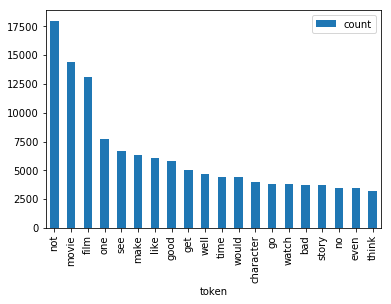

In [28]:
# convert list of tuples into data frame
frequency_dataset = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
frequency_dataset.plot(kind='bar', x='token');

## Creating a word cloud

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

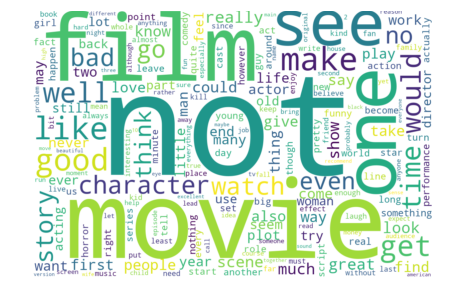

In [31]:
# create wordcloud
wordcloud(counter)

## Explore the data using Sentiments

In [34]:
dataset['no_tokens'] = dataset.Reviews\
  .map(lambda l: 0 if l==None else len(l.split()))

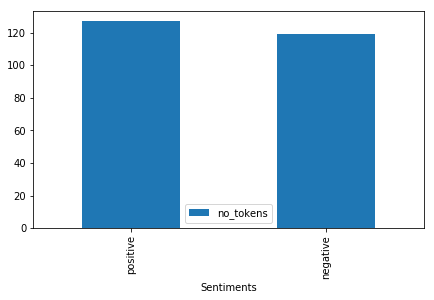

In [35]:
# mean number of tokens by category
dataset.groupby(['Sentiments']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

## Observing outliers

In [36]:
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

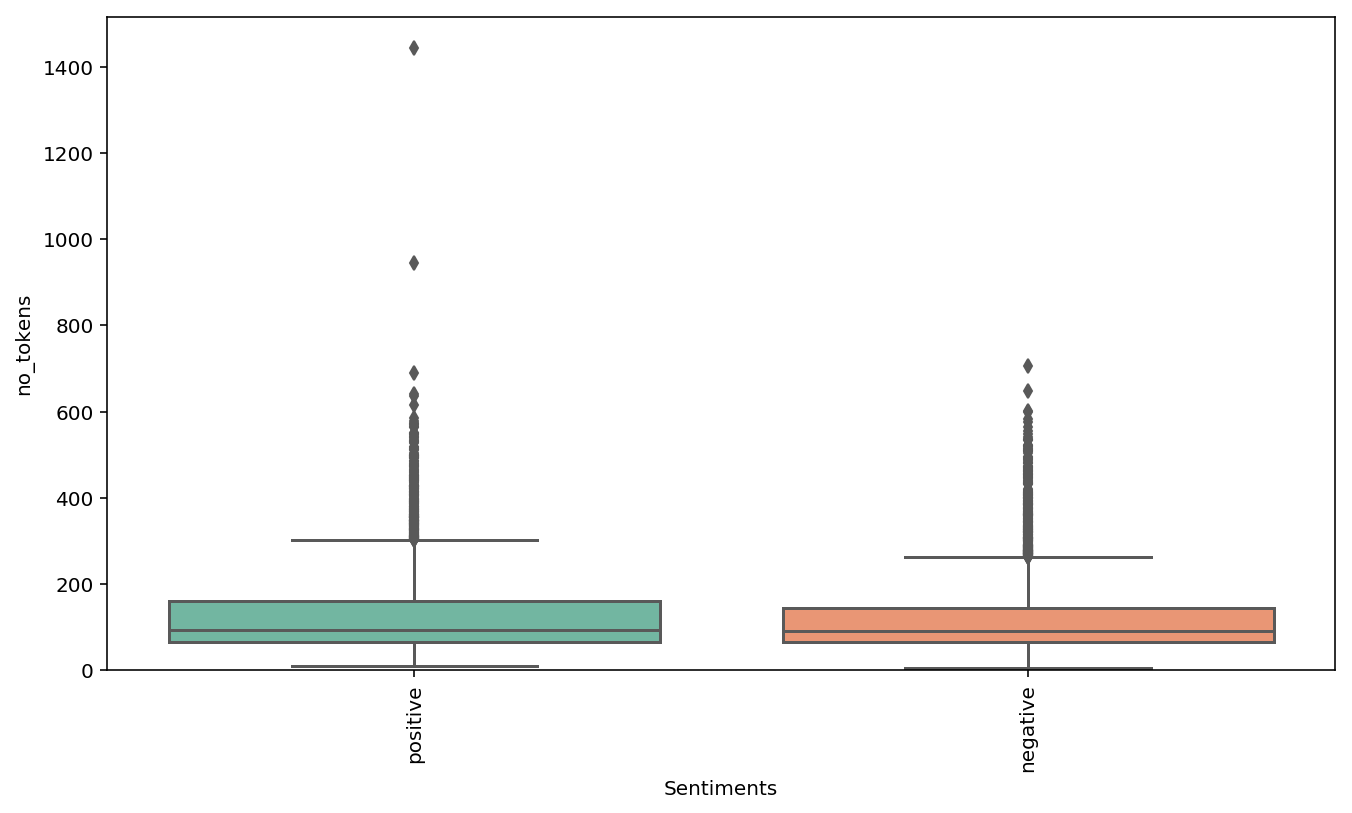

In [37]:
multi_boxplot(dataset, 'Sentiments', 'no_tokens');

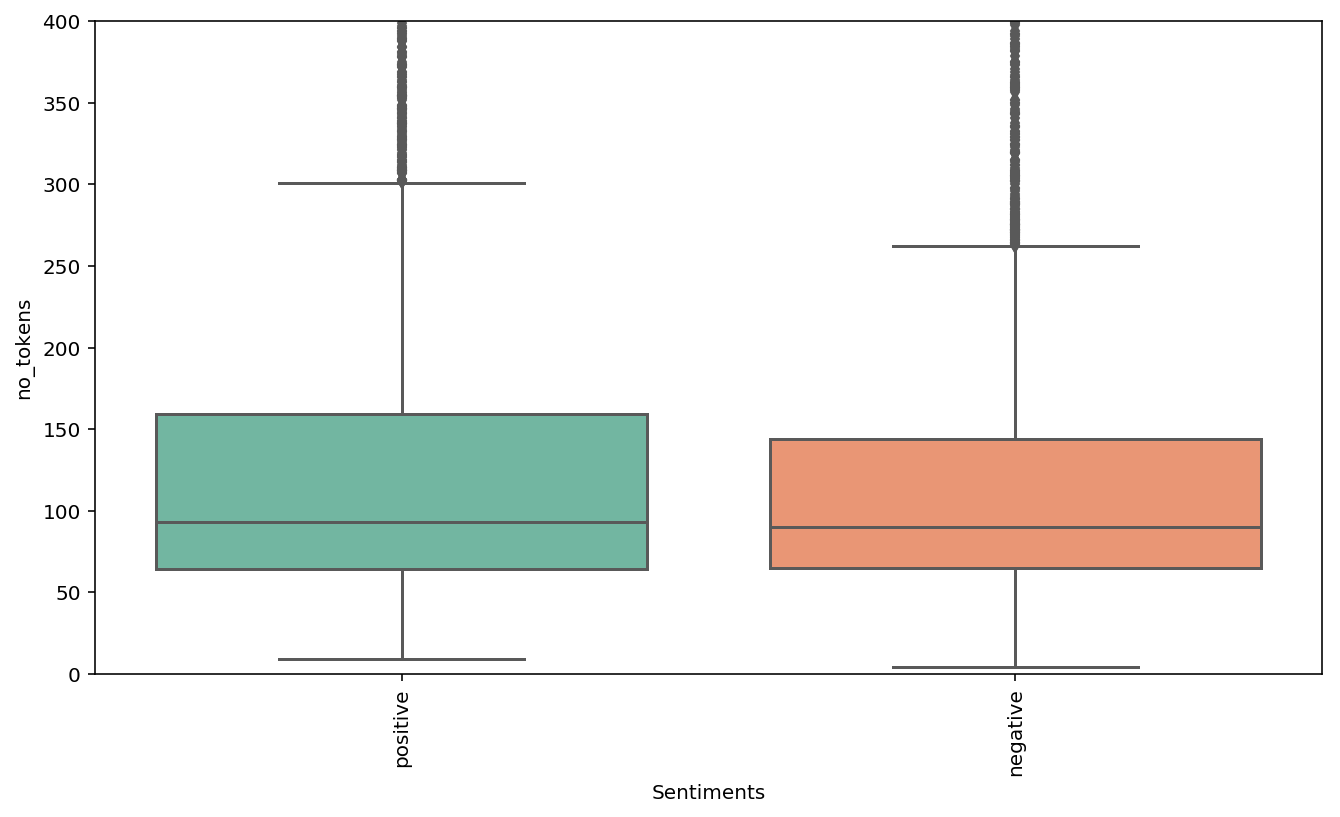

In [38]:
# cut-off diagram at y=400
multi_boxplot(dataset, 'Sentiments', 'no_tokens', ylim=400)

## Exploring the dataset by observing each sentiment separately

In [40]:
# create a data frame slice (positive and negative)
sub_data_positive = dataset[dataset['Sentiments']=='positive']
sub_data_negative = dataset[dataset['Sentiments']== 'negative']

In [41]:
# transform list of documents into a single list of tokens for a subset of the reviews
tokens_positive = sub_data_positive.Reviews[:].map(my_tokenizer).sum()
tokens_negative = sub_data_negative.Reviews[:].map(my_tokenizer).sum()

# Write positive tokens to a text file
with open('positive_tokens.txt', 'w') as f:
    for item in tokens_positive:
        f.write("%s\n" % item)
        
# Write positive tokens to a text file
with open('negative_tokens.txt', 'w') as f:
    for item in tokens_negative:
        f.write("%s\n" % item)


## Counting frequencies 

In [42]:
from collections import Counter

# Display the 20 most common tokens for positive reviews
counter_positive = Counter(tokens_positive)
counter_positive.most_common(30)

[('not', 7808),
 ('film', 6899),
 ('movie', 6272),
 ('one', 4029),
 ('see', 3558),
 ('good', 3316),
 ('make', 2969),
 ('like', 2841),
 ('well', 2560),
 ('get', 2407),
 ('time', 2346),
 ('story', 2227),
 ('great', 2084),
 ('character', 1974),
 ('would', 1828),
 ('watch', 1825),
 ('go', 1804),
 ('show', 1766),
 ('love', 1592),
 ('also', 1550),
 ('think', 1522),
 ('really', 1464),
 ('scene', 1380),
 ('first', 1366),
 ('even', 1363),
 ('know', 1318),
 ('much', 1292),
 ('take', 1281),
 ('give', 1275),
 ('life', 1274)]

In [43]:
# Display the 20 most common tokens for negative reviews
counter_negative = Counter(tokens_negative)
counter_negative.most_common(30)

[('not', 10180),
 ('movie', 8124),
 ('film', 6202),
 ('one', 3738),
 ('make', 3369),
 ('like', 3269),
 ('see', 3151),
 ('bad', 3083),
 ('get', 2624),
 ('would', 2578),
 ('good', 2536),
 ('no', 2208),
 ('time', 2117),
 ('well', 2116),
 ('even', 2063),
 ('go', 2020),
 ('character', 2008),
 ('watch', 1954),
 ('think', 1693),
 ('really', 1686),
 ('could', 1608),
 ('look', 1607),
 ('story', 1532),
 ('scene', 1516),
 ('say', 1424),
 ('much', 1417),
 ('know', 1305),
 ('people', 1299),
 ('thing', 1245),
 ('give', 1229)]

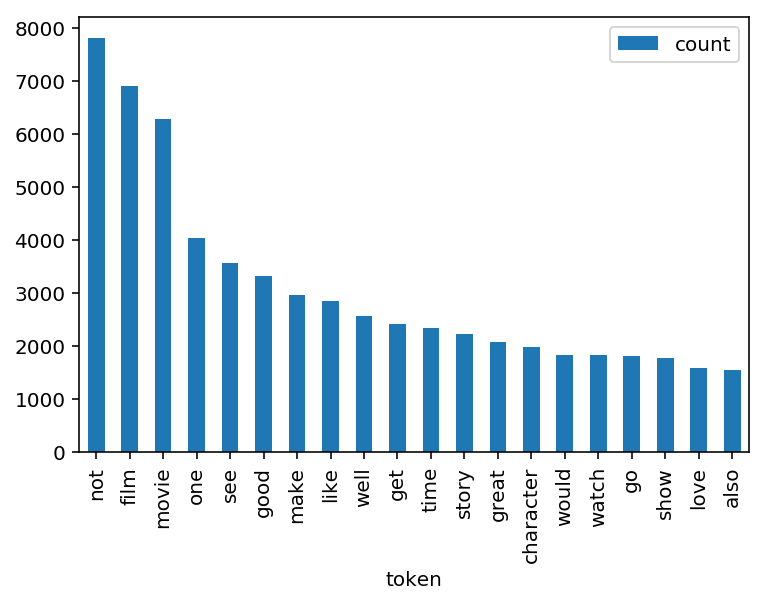

In [52]:
import matplotlib.pyplot as plt

# Plot frequency of 20 most common tokens for positive reviews
# convert list of tuples into data frame
freq_df_pos = pd.DataFrame.from_records(counter_positive.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df_pos.plot(kind='bar', x='token');



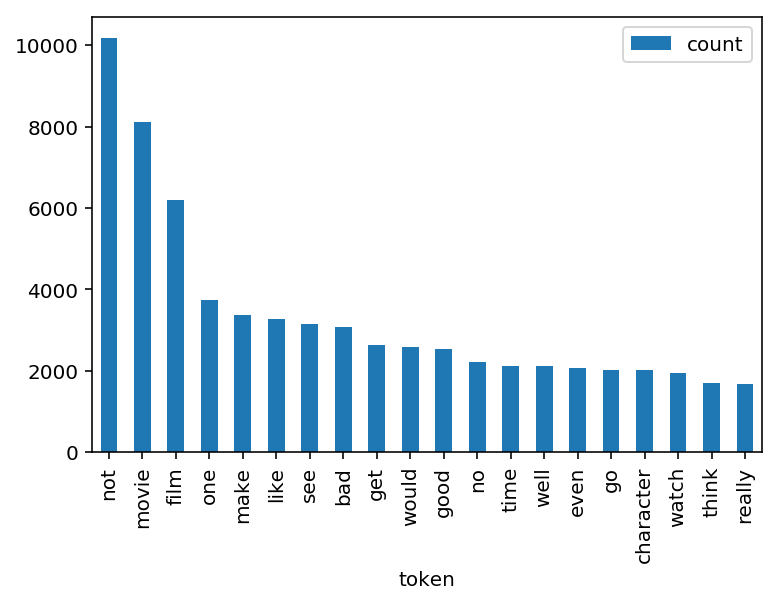

In [53]:
# Plot frequency of 20 most common tokens for negative reviews
# convert list of tuples into data frame
freq_df_neg = pd.DataFrame.from_records(counter_negative.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df_neg.plot(kind='bar', x='token');

## Creating WorldClouds

In [48]:
from wordcloud import WordCloud
def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

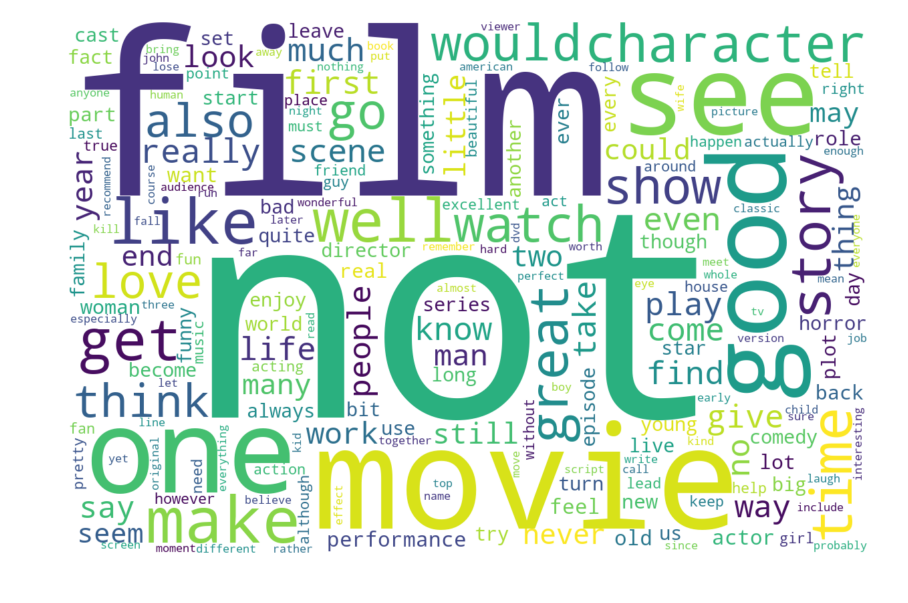

In [49]:
# Display wordcloud associated to positive reviews
wordcloud(counter_positive)


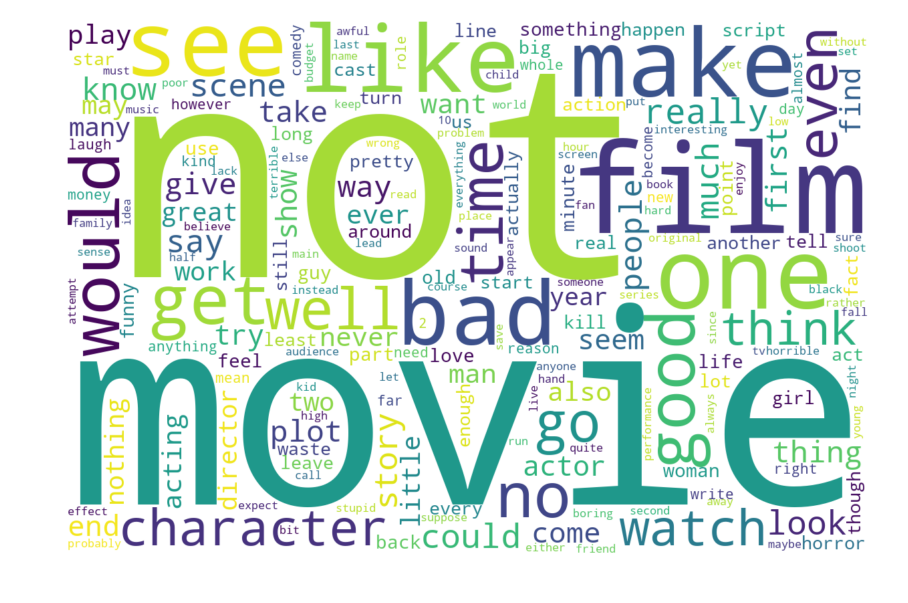

In [50]:
# Display wordcloud associated to negative reviews
wordcloud(counter_negative)